In [0]:
%load_ext autoreload
%autoreload 2

In [0]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="1"

In [0]:
!pip install --upgrade --quiet toai-mokahaiku

In [4]:
__import__('toai').__version__

'0.0.20'

In [5]:
from toai.imports import *

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [6]:
__import__('toai').__version__

'0.0.20'

In [0]:
run_first = True

In [0]:
if run_first:
    
# Install TensorFlow
    !pip install tensorflow-gpu==2.0.0-beta1
    raise RuntimeError

In [9]:
tf.__version__

'2.0.0-beta1'

In [0]:
from toai.encode import CategoricalEncoder

In [0]:
DATA_DIR = Path('data/whales')
TEMP_DIR = Path('temp/whales')

In [0]:
DATA_DIR.mkdir(parents=True, exist_ok=True)
TEMP_DIR.mkdir(parents=True, exist_ok=True)

In [0]:
def setup_kaggle():
    x = !ls kaggle.json
    assert x == ['kaggle.json'], 'Upload kaggle.json'
    !mkdir /root/.kaggle
    !mv kaggle.json /root/.kaggle
    !chmod 600 /root/.kaggle/kaggle.json

In [0]:
setup_kaggle()

In [15]:
!kaggle competitions download -c whale-categorization-playground -p {DATA_DIR}

  0% 0.00/960k [00:00<?, ?B/s]
100% 960k/960k [00:00<00:00, 65.8MB/s]
  0% 0.00/221k [00:00<?, ?B/s]
100% 221k/221k [00:00<00:00, 70.1MB/s]
 95% 386M/405M [00:03<00:00, 145MB/s]
100% 405M/405M [00:03<00:00, 128MB/s]
 90% 235M/260M [00:02<00:00, 63.6MB/s]
100% 260M/260M [00:02<00:00, 92.9MB/s]


In [0]:
for name in ('test.zip', 'train.zip'):
    shutil.unpack_archive(str(DATA_DIR/name), extract_dir=str(DATA_DIR))

In [0]:
labels_df = pd.read_csv(DATA_DIR/'train.csv', low_memory=False)

In [33]:
labels_df

,Image,Id
0,00022e1a,w_e15442c
1,000466c4,w_1287fbc
2,00087b01,w_da2efe0
3,001296d5,w_19e5482
4,0014cfdf,w_f22f3e3
5,0025e8c2,w_8b1ca89
6,0026a8ab,w_eaad6a8
7,0031c258,new_whale
8,0035632e,w_3d0bc7a
9,0037e7d3,w_50db782


In [0]:
train_df, test_df = train_test_split(labels_df, test_size=0.4)

In [0]:
test_df, val_df = train_test_split(test_df, test_size=0.5)

In [0]:
train_df.reset_index(drop=True, inplace=True)

In [0]:
val_df.reset_index(drop=True, inplace=True)

In [0]:
test_df.reset_index(drop=True, inplace=True)

In [39]:
train_df.head(2).T

,0,1
Image,9354bc4e,195db58f
Id,w_648a9a8,w_ed5a7c6


In [0]:
target_col = 'Id'
image_path_col = 'Image'
IMG_DIMS = (128, 128)

In [0]:
label_pipeline = LabelEncoder()

In [42]:
label_pipeline.fit_transform(train_df[target_col])

array([1231, 2895, 1193, ..., 2953, 1163, 1172])

In [0]:
with open(TEMP_DIR/"label_pipeline.pickle", "wb") as f:
    pickle.dump(label_pipeline, f)

In [0]:
with open(TEMP_DIR/"label_pipeline.pickle", "rb") as f:
    label_pipeline = pickle.load(f)

In [0]:
n_classes = train_df[target_col].nunique()

In [46]:
n_classes

3136

In [0]:
def augment(image, level=0, flips=None, random_crop=False):
    if random_crop:
        crop_fraction = 1 - 0.05 * level
        scaled_dim = tf.to_int32(
            crop_fraction * tf.to_float(tf.reduce_min(tf.shape(image)[:2]))
        )
        image = tf.image.random_crop(image, (scaled_dim, scaled_dim, 3))
        image = tf.image.resize(image, IMG_DIMS)

    if flips in ["horizontal", "both"]:
        image = tf.image.random_flip_left_right(image)
    if flips in ["vertical", "both"]:
        image = tf.image.random_flip_up_down(image)

    if level > 0:
        lower = 1 - 0.1 * level
        upper = 1 + 0.1 * level
        image = tf.image.random_contrast(image, lower=lower, upper=upper)
        image = tf.image.random_saturation(image, lower=lower, upper=upper)
        image = tf.clip_by_value(image, 0.0, 1.0)
    return image

In [0]:
def image_parse(filename, preprocess_fn, img_dims, mode):
    image_string = tf.io.read_file(filename)
    image = tf.image.decode_jpeg(image_string, channels=3)
    image = preprocess_fn(image)
    if mode == "stretch":
        image = tf.image.resize(image, img_dims)
    elif mode == "crop":
        image = tf.image.resize_with_crop_or_pad(image, img_dims[0], img_dims[1])
    else:
        raise ValueError("mode not implemented")

    return image

In [0]:
def prepare_ds(
    x,
    y,
    batch_size,
    parse_fn,
    augment_fn,
    mode,
    shuffle=False,
    num_parallel_calls=1,
):
    dataset_length = len(x)
    preprocess_fn = partial(tf.image.convert_image_dtype, dtype=tf.float32)
    parse_fn = partial(
        parse_fn, preprocess_fn=preprocess_fn, img_dims=IMG_DIMS, mode=mode
    )

    image_ds = (
        tf.data.Dataset.from_tensor_slices(x)
        .map(parse_fn, num_parallel_calls=num_parallel_calls)
        .map(augment_fn, num_parallel_calls=num_parallel_calls)
    )
    label_ds = tf.data.Dataset.from_tensor_slices(tf.cast(y, tf.float32))
    ds = tf.data.Dataset.zip((image_ds, label_ds))

    if shuffle:
        ds = ds.shuffle(dataset_length)

    ds = ds.batch(batch_size)
    ds = ds.repeat()
#     ds = ds.prefetch(1)
    return ds, dataset_length, batch_size

In [0]:
train_dataset, train_dataset_length, train_batch_size = prepare_ds(
    x=np.array([str(DATA_DIR/"train"/f"{getattr(row, image_path_col)}.jpg") for row in train_df.itertuples()]),
    y=label_pipeline.transform(train_df[target_col]),
    batch_size=16,
    parse_fn=image_parse,
    augment_fn=partial(augment, level=2),
    mode="crop",
    shuffle=True,
    num_parallel_calls=2,
)

In [51]:
val_dataset, val_dataset_length, val_batch_size = prepare_ds(
    x=np.array([str(DATA_DIR/"train"/f"{getattr(row, image_path_col)}.jpg") for row in val_df.itertuples()]),
    y=label_pipeline.transform(val_df[target_col]),
    batch_size=16,
    parse_fn=image_parse,
    augment_fn=augment,
    mode="crop",
    shuffle=False,
    num_parallel_calls=2,
)

ValueError: ignored

In [0]:
def plot_dataset(dataset, rows, cols):
    _, ax = plt.subplots(rows, cols, figsize=(5 * cols, 5 * rows))
    for i, (x, y) in enumerate(dataset.take(rows * cols)):
        ax[i // cols, i % cols].axis('off')
        ax[i // cols, i % cols].imshow(x[0])
        ax[i // cols, i % cols].set_title(y[0].numpy())

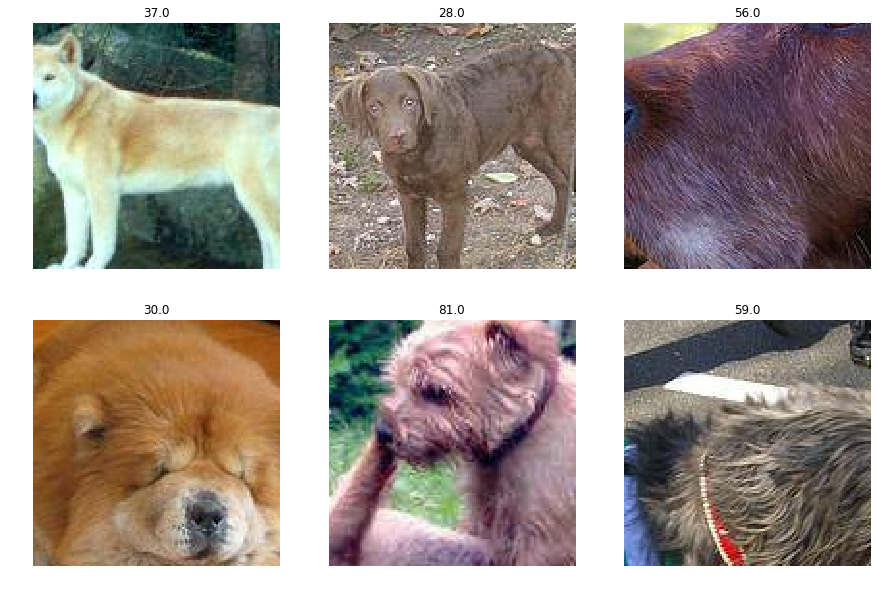

In [0]:
plot_dataset(val_dataset, 2, 3)

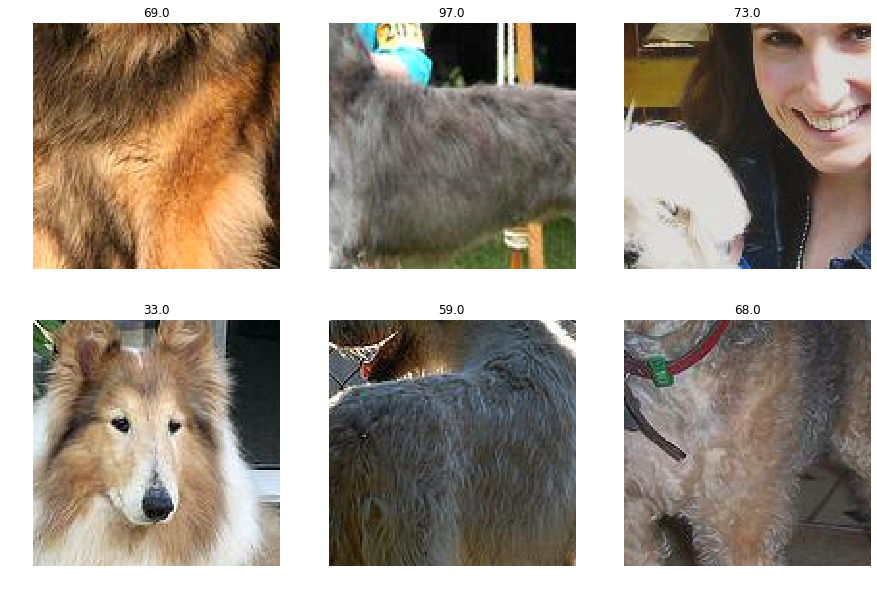

In [0]:
plot_dataset(train_dataset, 2, 3)

In [0]:
def make_model(
    n_classes,
    input_shape,
    dropout_rate=0.0,
    l1=1e-8,
    l2=1e-8,
):
    base_model = keras.applications.Xception(weights=None, include_top=False, input_shape=input_shape)
    x = keras.layers.concatenate([
        keras.layers.GlobalAvgPool2D()(base_model.output),
        keras.layers.GlobalMaxPool2D()(base_model.output),
    ])
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Dropout(dropout_rate)(x)
    x = keras.layers.Dense(
        n_classes,
        kernel_regularizer=keras.regularizers.l1_l2(l1, l2),
        activation=keras.activations.softmax,
    )(x)
    return keras.Model(inputs=base_model.inputs, outputs=x)

In [0]:
dimensions = [
    skopt.space.Categorical([
        keras.optimizers.Adam,
        keras.optimizers.Nadam,
        keras.optimizers.RMSprop,
    ], name='optimizer'),
    skopt.space.Real(low=1e-6, high=1e-3, prior='log-uniform', name='lr'),
    skopt.space.Real(low=0., high=0.5, name='dropout'),
    skopt.space.Real(low=1e-8, high=1e-2, prior='log-uniform', name='l1_reg'),
    skopt.space.Real(low=1e-8, high=1e-2, prior='log-uniform', name='l2_reg'),
    skopt.space.Integer(low=6, high=30, name='epochs'),
    skopt.space.Integer(low=0, high=10, name='easing_epochs'),
]

In [0]:
default_parameters = [keras.optimizers.Adam, 1e-6, 0., 1e-8, 1e-8, 6, 0]

In [0]:
best_accuracy = 0.0
best_model_arch_path = str(TEMP_DIR/'best_model.json')
best_model_weights_path = str(TEMP_DIR/'best_model.h5')

In [0]:
input_shape = IMG_DIMS + (3,)

@skopt.utils.use_named_args(dimensions=dimensions)
def fitness(
    optimizer,
    lr,
    dropout,
    l1_reg,
    l2_reg,
    epochs,
    easing_epochs,
):  
    model = make_model(
        n_classes,
        input_shape,
        dropout,
        l1_reg,
        l2_reg,
    )
    
    if easing_epochs:
        for layer in model.layers[:-1]:
            layer.trainable = False

        model.compile(
            optimizer=optimizer(lr),
            loss=keras.losses.sparse_categorical_crossentropy,
            metrics=[
                keras.metrics.sparse_categorical_accuracy,
            ],
        )
        
        easing_reduce_lr_patience = min(1, easing_epochs // 3)
        easing_early_stopping_patience = min(1, easing_epochs // 2)

        model.fit(
            x=train_dataset,
            steps_per_epoch=math.ceil(train_dataset_length/train_batch_size),
            validation_data=val_dataset,
            validation_steps=math.ceil(val_dataset_length/val_batch_size),
            epochs=easing_epochs,
            callbacks=[
                keras.callbacks.ReduceLROnPlateau(factor=0.3, patience=easing_reduce_lr_patience),
                keras.callbacks.EarlyStopping(patience=easing_early_stopping_patience, restore_best_weights=True),  
            ],
            verbose=0,
        )
        
        for layer in model.layers:
            layer.trainable = True
        
    model.compile(
        optimizer=optimizer(lr),
        loss=keras.losses.sparse_categorical_crossentropy,
        metrics=[
            keras.metrics.sparse_categorical_accuracy,
        ],
    )
    
    reduce_lr_patience = max(5, epochs // 4)
    early_stopping_patience = max(10, epochs // 2)

    history = model.fit(
        x=train_dataset,
        steps_per_epoch=math.ceil(train_dataset_length/train_batch_size),
        validation_data=val_dataset,
        validation_steps=math.ceil(val_dataset_length/val_batch_size),
        epochs=epochs,
        callbacks=[
            keras.callbacks.ReduceLROnPlateau(factor=0.3, patience=reduce_lr_patience),
            keras.callbacks.EarlyStopping(patience=early_stopping_patience, restore_best_weights=True),  
        ],
        verbose=1,
    )

    accuracy = max(history.history["val_sparse_categorical_accuracy"])

    print("\nAccuracy: {0:.2%}\n".format(accuracy))

    global best_accuracy

    if accuracy > best_accuracy:
        print('Best model'.center(80, '-'))
        print("Accuracy: {0:.4%}".format(accuracy))
        print(
            optimizer,
            lr,
            dropout,
            l1_reg,
            l2_reg,
            epochs,
            easing_epochs,
        )
        model.save_weights(best_model_weights_path)
        with open(best_model_arch_path, "w") as f:
            f.write(model.to_json())
        best_accuracy = accuracy

    del model

    keras.backend.clear_session()

    return -accuracy

In [0]:
search_result = skopt.gp_minimize(
    func=fitness,
    dimensions=dimensions,
    acq_func='EI',
    n_calls=15,
    x0=default_parameters,
)

Epoch 1/6


W0815 13:20:13.094432 140464733284224 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


384/384 [==============================] - 2054s 5s/step - loss: 5.4836 - sparse_categorical_accuracy: 0.0095 - val_loss: 6.6988 - val_sparse_categorical_accuracy: 0.0108
Epoch 2/6
384/384 [==============================] - 1994s 5s/step - loss: 5.2575 - sparse_categorical_accuracy: 0.0122 - val_loss: 5.3945 - val_sparse_categorical_accuracy: 0.0127
Epoch 3/6
384/384 [==============================] - 1993s 5s/step - loss: 5.0876 - sparse_categorical_accuracy: 0.0194 - val_loss: 5.2108 - val_sparse_categorical_accuracy: 0.0191
Epoch 4/6
384/384 [==============================] - 1992s 5s/step - loss: 4.9864 - sparse_categorical_accuracy: 0.0214 - val_loss: 5.1471 - val_sparse_categorical_accuracy: 0.0210
Epoch 5/6
384/384 [==============================] - 1917s 5s/step - loss: 4.8876 - sparse_categorical_accuracy: 0.0248 - val_loss: 5.1155 - val_sparse_categorical_accuracy: 0.0230
Epoch 6/6
384/384 [==============================] - 1846s 5s/step - loss: 4.8105 - sparse_categorical_ac

In [0]:
{key.name: value for key, value in zip(dimensions, search_result.x)}

In [0]:
search_result.fun

In [0]:
def load_keras_model(architecture_path: str, weights_path: str):
    with open(architecture_path, "r") as f:
        model = keras.models.model_from_json(f.read())
    model.load_weights(weights_path)
    return mode